## Regression models  

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Life_Expectancy_Data.csv")
data.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [3]:
data.rename(columns={'Life expectancy ':'Life_Expectancy', 'Adult Mortality':'Adult_Mortality',
                          'infant deaths':'Infant_Deaths','percentage expenditure':'Percentage_Exp',
                          'Hepatitis B':'Hepatitis_B', 'Measles ':'Measles', ' BMI ':'BMI',
                          'under-five deaths ':'under_five_deaths', 'Total expenditure':'Total_Exp',
                          'Diphtheria ':'Diphtheria', ' HIV/AIDS':'HIV/AIDS',
                          ' thinness  1-19 years':'thinness_1_to_19', ' thinness 5-9 years':'thinness_5_to_9',
                          'Income composition of resources':'Income_composition_resources'}, inplace=True)

In [4]:
data.fillna(data.mean(), inplace=True)

We drop the column 'Country, under_five_deaths and thinness_5_to_9' as it will no longer be needed for running the models. There are too many country names, hence high cardinality and we cannot create one hot vector for this column

In [5]:
data.drop(columns=['Country','under_five_deaths','thinness_5_to_9'],axis =1, inplace=True)

In [6]:
data['Status']=data['Status'].map({'Developing':1,'Developed':0}).astype(int)

In [7]:
X = data.drop(['Life_Expectancy'],axis =1)
y = data['Life_Expectancy']

In [8]:
X_train_first, X_test_first, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [9]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_first)
X_test = scaler.transform(X_test_first)

In [10]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.266667,1.0,0.308864,0.004444,0.000000,0.000257,0.813819,0.023748,0.261877,0.677083,0.256669,0.051546,0.023762,0.000526,0.000291,0.032609,0.475738,0.323671
1,0.866667,1.0,0.264543,0.000000,0.000000,0.010301,0.979381,0.000000,0.327926,0.979167,0.556609,0.979381,0.001980,0.013976,0.000016,0.202899,0.589662,0.531401
2,0.933333,1.0,0.009695,0.000000,0.265018,0.022010,0.989691,0.000000,0.651217,0.989583,0.326615,0.989691,0.000000,0.039514,0.000245,0.039855,0.802743,0.685990
3,0.333333,1.0,0.527701,0.051111,0.296231,0.005041,0.813819,0.001216,0.193511,0.375000,0.221103,0.371134,0.049505,0.012460,0.016574,0.032609,0.449367,0.328502
4,0.466667,1.0,0.131579,0.158333,0.227915,0.016051,0.927835,0.513816,0.286211,0.947917,0.234143,0.938144,0.000000,0.023270,0.001117,0.166667,0.695148,0.550725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,0.333333,1.0,0.439058,0.001111,0.071849,0.000652,0.813819,0.001404,0.025492,0.708333,0.405453,0.711340,0.075248,0.000804,0.000664,0.210145,0.417722,0.193237
2052,0.933333,1.0,0.042936,0.001667,0.000000,0.000688,0.000000,0.000061,0.266512,0.218750,0.203320,0.000000,0.085149,0.001649,0.000957,0.304348,0.613924,0.444444
2053,0.866667,1.0,0.037396,0.004444,0.000000,0.000456,0.061856,0.000292,0.329085,0.052083,0.193242,0.061856,0.019802,0.001243,0.000334,0.289855,0.528481,0.396135
2054,0.600000,1.0,0.227147,0.001111,0.004711,0.001858,0.721649,0.000047,0.163384,0.781250,0.049200,0.721649,0.000000,0.006528,0.000016,0.416667,0.631857,0.584541


In [11]:
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape",y_test.shape)

X_train shape:  (2056, 18)
y_train shape:  (2056,)
X_test shape:  (882, 18)
y_test shape (882,)


We are going to evaluate and visualize the performance of different models 
1. Train the models with default parameters
2. Train the models with best hyperparmter tuning using gridsearchcv

# 1. KNN Regression

In [12]:
#To find the Default parameters of KNN regressor model
KNNreg = KNeighborsRegressor()
KNNreg_params = KNNreg.get_params()
print(f'Default KNN Reg hyperparameters: {KNNreg_params}')

Default KNN Reg hyperparameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [13]:
# Train the model with the Default Parameters
knn_reg_default=KNeighborsRegressor()
knn_reg_default.fit(X_train, y_train)
y_knn_default_predicted = knn_reg_default.predict(X_test)
print('Train score: {:.4f}'.format(knn_reg_default.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn_reg_default.score(X_test, y_test)))
print("R2_score: {:.4f} ".format(metrics.r2_score(y_test,y_knn_default_predicted)))
MSE = np.square(np.subtract(y_test,y_knn_default_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))

Train score: 0.9301
Test score: 0.8700
R2_score: 0.8700 
MSE: 11.5972


In [14]:
np.where(X.columns == 'Adult_Mortality')

(array([2], dtype=int64),)

Text(0.5, 0, 'ADULT MORTALITY')

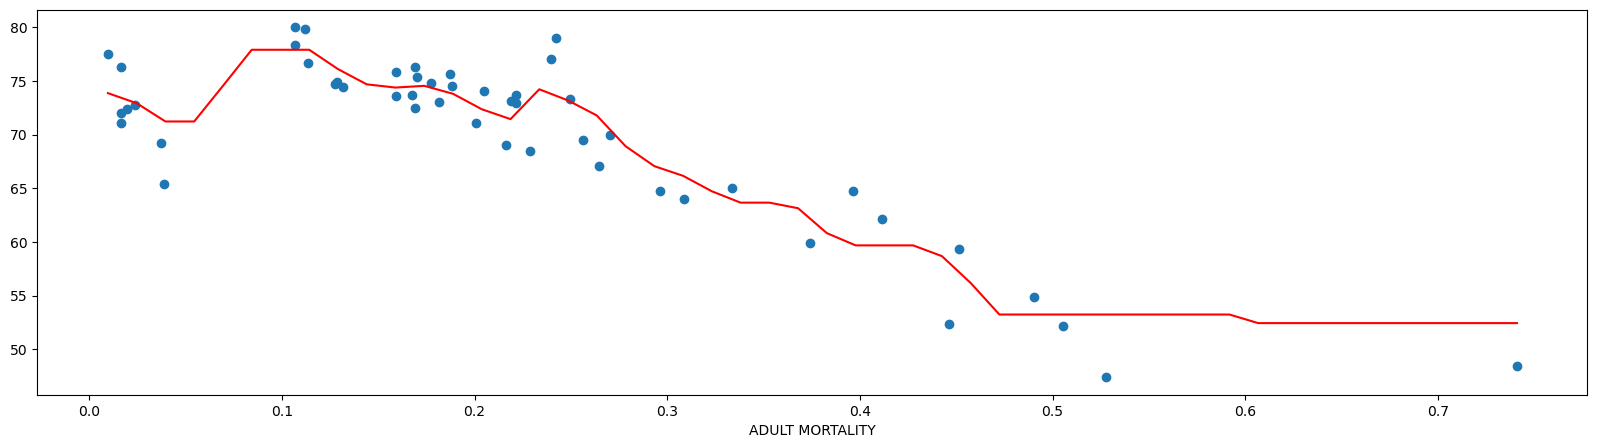

In [15]:
# fit the KNN regressor to the Adult Mortality Feature
X_b = X_train[:50,2].reshape(-1,1)
y_b = y_train[:50]
knn_reg_default.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg_default.predict(X_new)

plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('ADULT MORTALITY')

We can see that our chosen KNN Regressor fits the Adult Mortality feature well. We can also see that there is one point within the sample which pulls the regressor towards 0.8. If this point were to be removed, we would hace the regressor fitting and ending at 0.5.

## Findining the n values using grid serach cv

In [16]:
# Hyperparameter tuning for the KNN regressor model.
param_grid_knn = {'n_neighbors':range(2,10), 'weights':['distance','uniform'],'p': [1,2], 'leaf_size': [10, 20, 30],
                 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}
print("Parameter grid:\n{}".format(param_grid_knn))

grid_search_knn = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid_knn, return_train_score=True, cv=7)
grid_search_knn.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search_knn.best_params_))

Parameter grid:
{'n_neighbors': range(2, 10), 'weights': ['distance', 'uniform'], 'p': [1, 2], 'leaf_size': [10, 20, 30], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}
Best parameters: {'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [17]:
# Train the model with the best parameters
knn_reg_best = KNeighborsRegressor(n_neighbors =3 , weights = 'distance', p=1, metric ='manhattan', leaf_size=10)
knn_reg_best.fit(X_train, y_train)
y_knn_best_predicted = knn_reg_best.predict(X_test)
print('Train score: {:.4f}'.format(knn_reg_best.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn_reg_best.score(X_test, y_test)))
print("R2_score: {:.4f} ".format(metrics.r2_score(y_test,y_knn_best_predicted)))
MSE = np.square(np.subtract(y_test,y_knn_best_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))

Train score: 1.0000
Test score: 0.9316
R2_score: 0.9316 
MSE: 6.1002


Text(0.5, 0, 'ADULT MORTALITY')

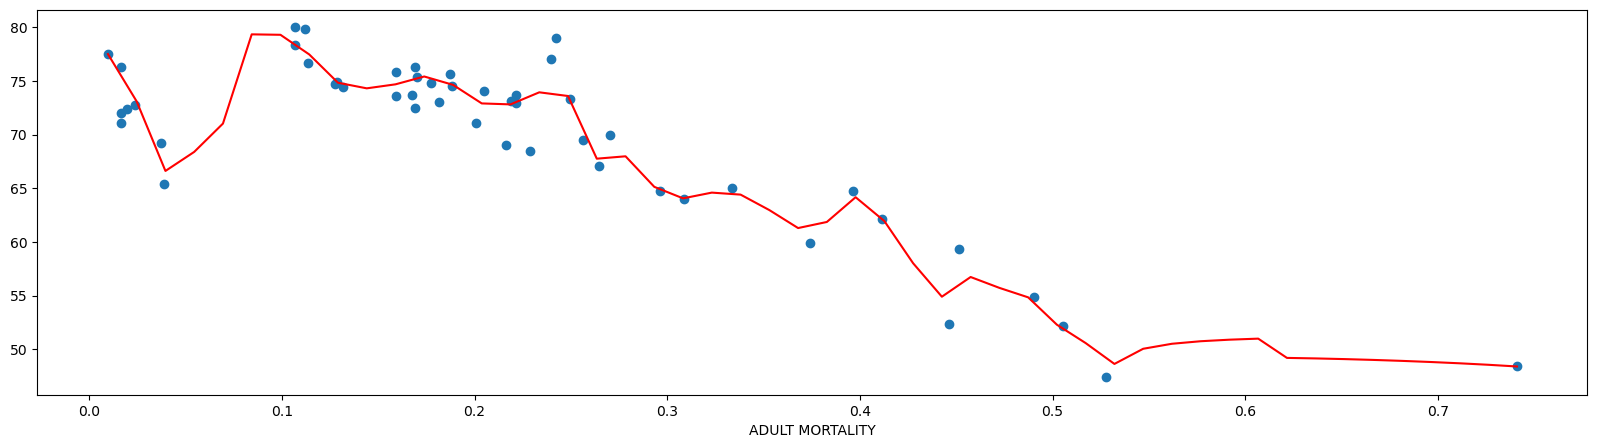

In [18]:
knn_reg_best.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg_best.predict(X_new)

plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('ADULT MORTALITY')

# 2. Linear Regression

In [19]:
#To find the Default parameters of Linear regresson model
linear_reg = LinearRegression()
linear_reg_params = linear_reg.get_params()
print(f'Default Linear Reg hyperparameters: {linear_reg_params}')

Default Linear Reg hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [20]:
# Train the model with default parameters
linear_Reg_default = LinearRegression()
linear_Reg_default.fit(X_train, y_train)
y_linear_default_predicted = linear_Reg_default.predict(X_test)
print('Train Score: {:.4f}'.format(linear_Reg_default.score(X_train, y_train)))
print('Test Score:{:.4f}'.format(linear_Reg_default.score(X_test, y_test)))
print('MSE:', metrics.mean_squared_error(y_test,y_linear_default_predicted))
print('R2_score: {:.4f}'.format(metrics.r2_score(y_test,y_linear_default_predicted)))

Train Score: 0.8099
Test Score:0.8084
MSE: 17.094098668975747
R2_score: 0.8084


Text(0, 0.5, 'ADULT MORTALITY')

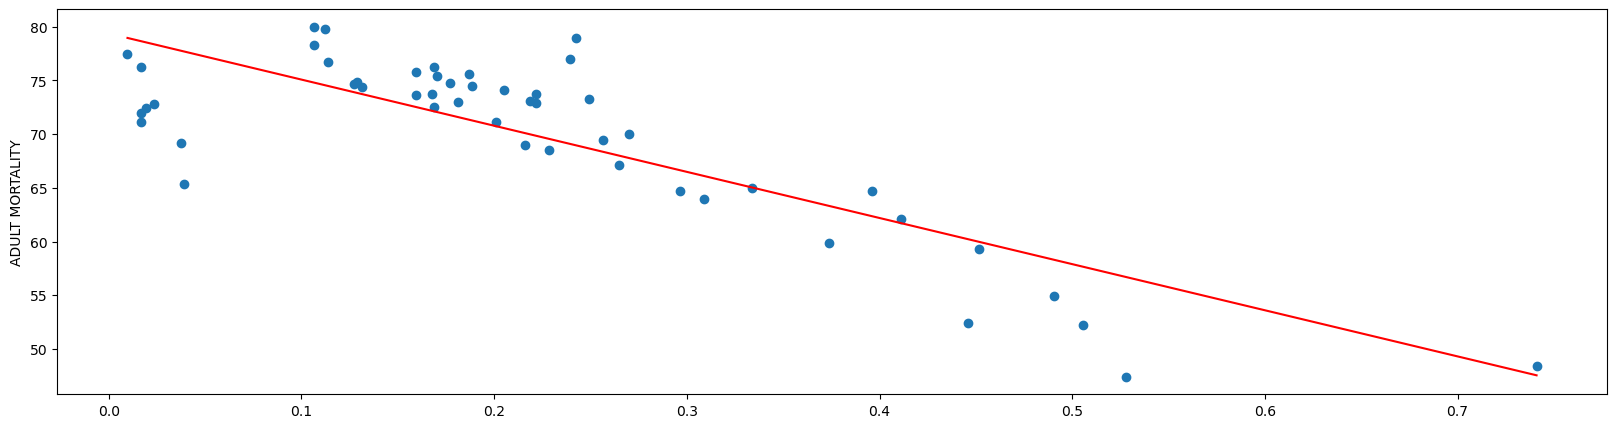

In [21]:
# fit the default linear regressor to the Adult Mortality Feature
linear_Reg_default.fit(X_b, y_b)
X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = linear_Reg_default.predict(X_new)
plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.ylabel('ADULT MORTALITY')

## Use Gridsearchcv to find the best hyperparameters for linear regression model

In [ ]:
# the default values for the regressor models are Default Linear Reg hyperparameters: 
# {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [23]:
# Hyperparameter tuning for the Linear regressor model. 
param_grid_lin = {'copy_X': [True,False], 'fit_intercept': [True,False], 'positive': [True,False]}
print("Parameter grid:\n{}".format(param_grid_lin))

grid_search_linear = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid_lin, return_train_score=True, n_jobs=None, cv=7)
grid_search_linear.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_linear.best_params_))

Parameter grid:
{'copy_X': [True, False], 'fit_intercept': [True, False], 'positive': [True, False]}
Best parameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}


# 3. Stochastic Gradient Descent (SGD)

In [24]:
# To find the Default parameters of SGD regressor model
sgd_reg = SGDRegressor()
sgdreg_params = sgd_reg.get_params()
print(f'Default SGD Reg hyperparameters: {sgdreg_params}')

Default SGD Reg hyperparameters: {'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_error', 'max_iter': 1000, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [26]:
# Train the model with the Default Parameters
sgd_reg_default = SGDRegressor()
sgd_reg_default.fit(X_train, y_train)
y_sgd_default_predicted = sgd_reg_default.predict(X_test)
print('SGD Reg Train score: {:.4f}'.format(sgd_reg_default.score(X_train, y_train)))
print('SGD Reg Test score:{:.4f}'.format(sgd_reg_default.score(X_test, y_test)))
print('R2_score: {:.4f}'.format(metrics.r2_score(y_test,y_sgd_default_predicted)))
MSE = np.square(np.subtract(y_test,y_sgd_default_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))

SGD Reg Train score: 0.8074
SGD Reg Test score:0.8072
R2_score: 0.8072
MSE: 17.2045


Text(0.5, 0, 'ADULT MORTALITY')

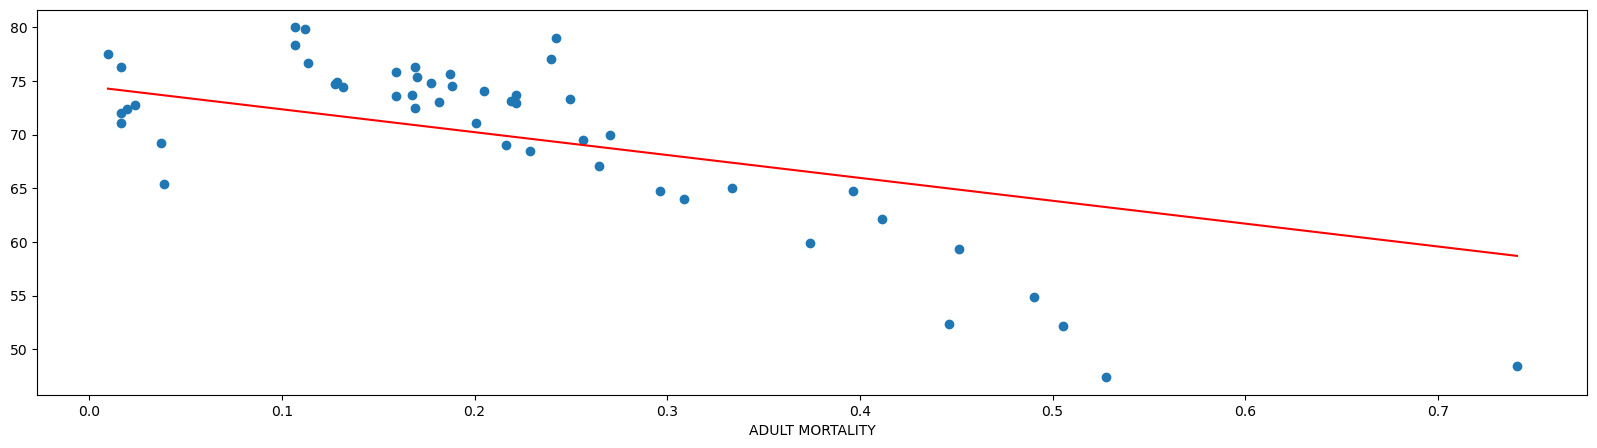

In [28]:
# fit the SGD regressor to the Adult Mortality Feature
sgd_reg_default.fit(X_b, y_b)
X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = sgd_reg_default.predict(X_new)
plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('ADULT MORTALITY')

## Use Gridsearchcv to find the best hyperparameters for SGD model

In [29]:
#We have considered only the important SGD params such as alpha, eta0, learning rate and max iteration
param_grid_sgd = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100], 'eta0': [0.001, 0.01, 0.05, 0.1, 1, 10, 100], 'learning_rate':['constant','optimal'], 'max_iter':[10,100]}
print("Parameter grid:\n{}".format(param_grid_sgd))
grid_search_sgd = GridSearchCV(estimator=sgd_reg, param_grid=param_grid_sgd, return_train_score=True, cv=5)
grid_search_sgd.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_sgd.best_params_))

Parameter grid:
{'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'eta0': [0.001, 0.01, 0.05, 0.1, 1, 10, 100], 'learning_rate': ['constant', 'optimal'], 'max_iter': [10, 100]}
Best parameters: {'alpha': 0.001, 'eta0': 0.01, 'learning_rate': 'constant', 'max_iter': 100}


In [30]:
# Train the model with the best parameters
sgd_reg_best = SGDRegressor(alpha= 0.001, eta0=0.01, learning_rate='constant', max_iter=100)
sgd_reg_best.fit(X_train, y_train)
y_sgd_best_predicted = sgd_reg_best.predict(X_test)
print('Train score: {:.4f}'.format(sgd_reg_best.score(X_train, y_train)))
print('Test score: {:.4f}'.format(sgd_reg_best.score(X_test, y_test)))
print('R2_score: {:.4f}'.format(r2_score(y_test,y_sgd_best_predicted)))
MSE = np.square(np.subtract(y_test,y_sgd_best_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))

Train score: 0.8073
Test score: 0.8052
R2_score: 0.8052
MSE: 17.3867


Text(0.5, 0, 'ADULT MORTALITY')

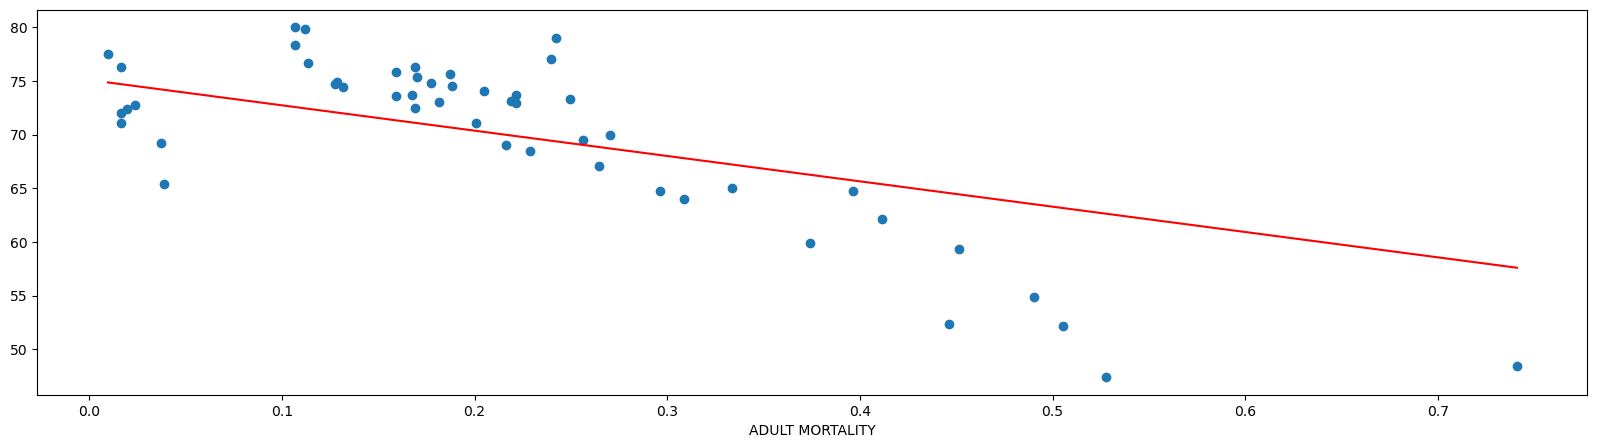

In [31]:
# fit the model
sgd_reg_best.fit(X_b, y_b)
X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = sgd_reg_best.predict(X_new)
plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('ADULT MORTALITY')

# 4. LASSO REGRESSION

In [32]:
#To find the Default parameters of KNN regressor model
lasso_reg = Lasso()
lassoreg_params = lasso_reg.get_params()
print(f'Default lasso Reg hyperparameters: {lassoreg_params}')

Default lasso Reg hyperparameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


In [33]:
# Train the model with the Default Parameters
lasso_reg_default = Lasso()
lasso_reg_default.fit(X_train,y_train)
y_lasso_default_predicted = lasso_reg_default.predict(X_test)
print('SGD Reg Train score: {:.4f}'.format(lasso_reg_default.score(X_train, y_train)))
print('SGD Reg Test score:{:.4f}'.format(lasso_reg_default.score(X_test, y_test)))
print('R2_score: {:.4f}'.format(metrics.r2_score(y_test,y_lasso_default_predicted)))
MSE = np.square(np.subtract(y_test,y_lasso_default_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))

SGD Reg Train score: 0.2633
SGD Reg Test score:0.2818
R2_score: 0.2818
MSE: 64.0837


Text(0.5, 0, 'ADULT MORTALITY')

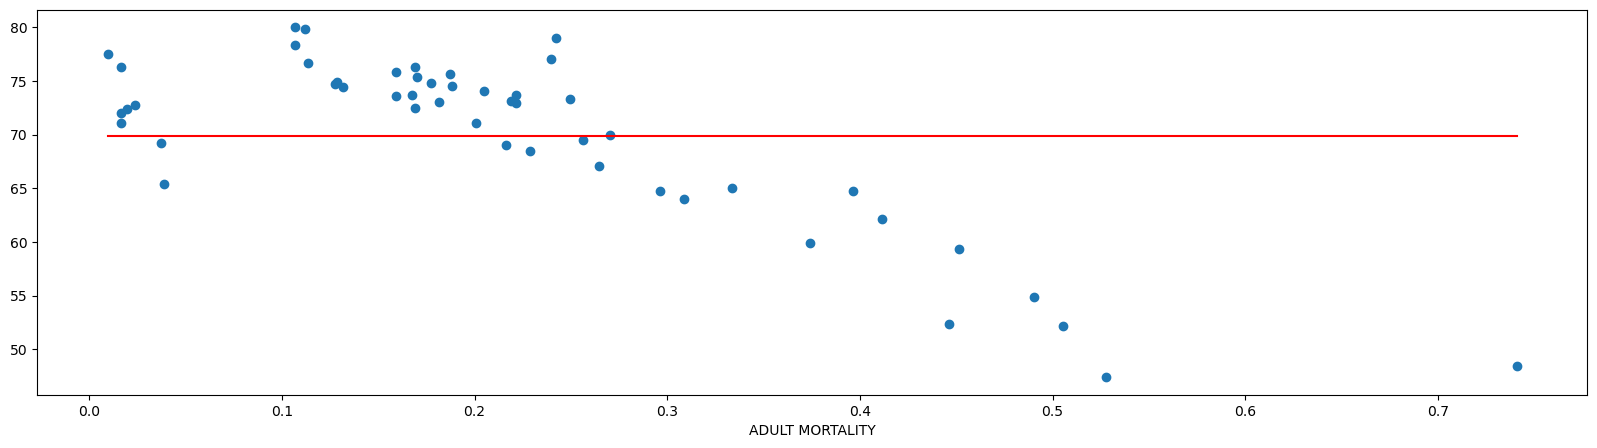

In [34]:
# fit the model
lasso_reg_default.fit(X_b, y_b)
X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = lasso_reg_default.predict(X_new)
plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('ADULT MORTALITY')

## Use Gridsearchcv to find the best hyperparameters for Lasso Regressor model

In [35]:
# Hyperparameter tuning for the Lasso regressor model.
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid_lasso))
lasso=Lasso()
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, return_train_score=True, cv=5)
grid_search_lasso.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_lasso.best_params_))

Parameter grid:
{'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'alpha': 0.001}


In [36]:
# Train the model with the best parameters
lasso_reg_best = Lasso(alpha= 0.001)
lasso_reg_best.fit(X_train, y_train)
y_lasso_best_predicted = lasso_reg_best.predict(X_test)
print('Train score: {:.4f}'.format(lasso_reg_best.score(X_train, y_train)))
print('Test score: {:.4f}'.format(lasso_reg_best.score(X_test, y_test)))
print('R2_score: {:.4f}'.format(r2_score(y_test,y_lasso_best_predicted)))
MSE = np.square(np.subtract(y_test,y_lasso_best_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))

Train score: 0.8099
Test score: 0.8084
R2_score: 0.8084
MSE: 17.0979


Text(0.5, 0, 'ADULT MORTALITY')

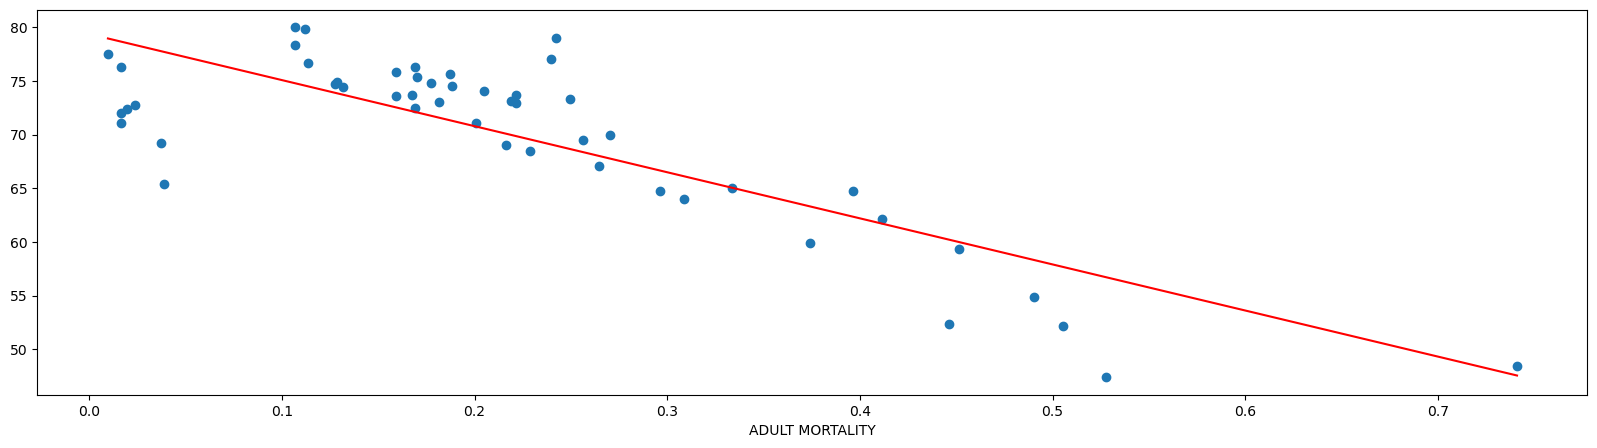

In [37]:
# fit the model
lasso_reg_best.fit(X_b, y_b)
X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = lasso_reg_best.predict(X_new)
plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('ADULT MORTALITY')

# 5. Linear Support Vector Regression (Linear SVR)

In [38]:
#To find the Default parameters of KNN regressor model
linear_svr = LinearSVR()
linearsvr_params = linear_svr.get_params()
print(f'Default Linear Reg hyperparameters: {linearsvr_params}')

Default Linear Reg hyperparameters: {'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_intercept': True, 'intercept_scaling': 1.0, 'loss': 'epsilon_insensitive', 'max_iter': 1000, 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [39]:
#Train the model with the Default Parameters
linear_svr_default = LinearSVR()
linear_svr_default.fit(X_train, y_train)
y_linear_default_predicted = linear_svr_default.predict(X_test)
print("Train score: {:.4f}".format(linear_svr_default.score(X_train, y_train)))
print("Test score: {:.4f}".format(linear_svr_default.score(X_test, y_test)))
print('R2_score: {:.4f}'.format(r2_score(y_test,y_linear_default_predicted)))
MSE = np.square(np.subtract(y_test,y_linear_default_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))

Train score: 0.7821
Test score: 0.7779
R2_score: 0.7779
MSE: 19.8209


Text(0.5, 0, 'ADULT MORTALITY')

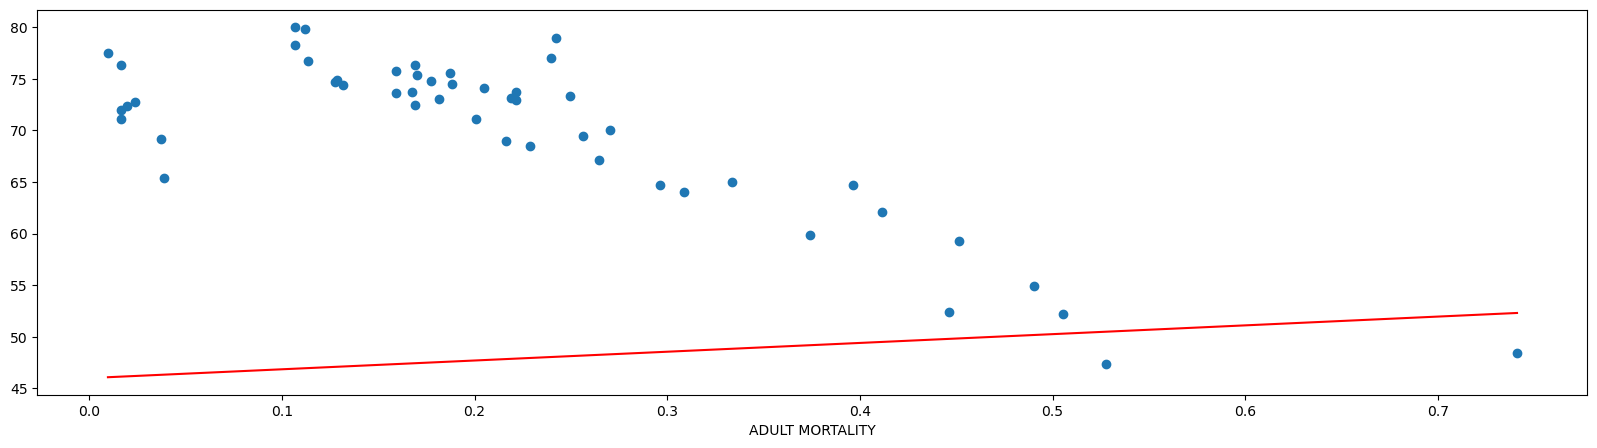

In [40]:
# fit the model
linear_svr_default.fit(X_b, y_b)
X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = linear_svr_default.predict(X_new)
plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('ADULT MORTALITY')

## Use Gridsearchcv to find the best hyperparameters for Linear SVR model

In [41]:
# Hyperparameter tuning for the Linear SVR regressor model.
param_grid_linsvr = {'max_iter' : range(1,100), 'C':[0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid_linsvr))
linear_svr = LinearSVR()
grid_search_linsvr= GridSearchCV(estimator =linear_svr , param_grid =param_grid_linsvr , return_train_score=True, cv=5)
grid_search_linsvr.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_linsvr.best_params_))

Parameter grid:
{'max_iter': range(1, 100), 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 10, 'max_iter': 80}


In [42]:
# Train the model with the best parameters
linsvr_reg_best= LinearSVR(C=10, max_iter=80)
linsvr_reg_best.fit(X_train, y_train)
y_linsvr_best_predicted = linsvr_reg_best.predict(X_test)
print('Train score: {:.4f}'.format(linsvr_reg_best.score(X_train, y_train)))
print('Test score: {:.4f}'.format(linsvr_reg_best.score(X_test, y_test)))
print('R2_score: {:.4f}'.format(r2_score(y_test,y_linsvr_best_predicted)))
MSE = np.square(np.subtract(y_test,y_linsvr_best_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))

Train score: 0.7988
Test score: 0.7972
R2_score: 0.7972
MSE: 18.1003


Text(0.5, 0, 'ADULT MORTALITY')

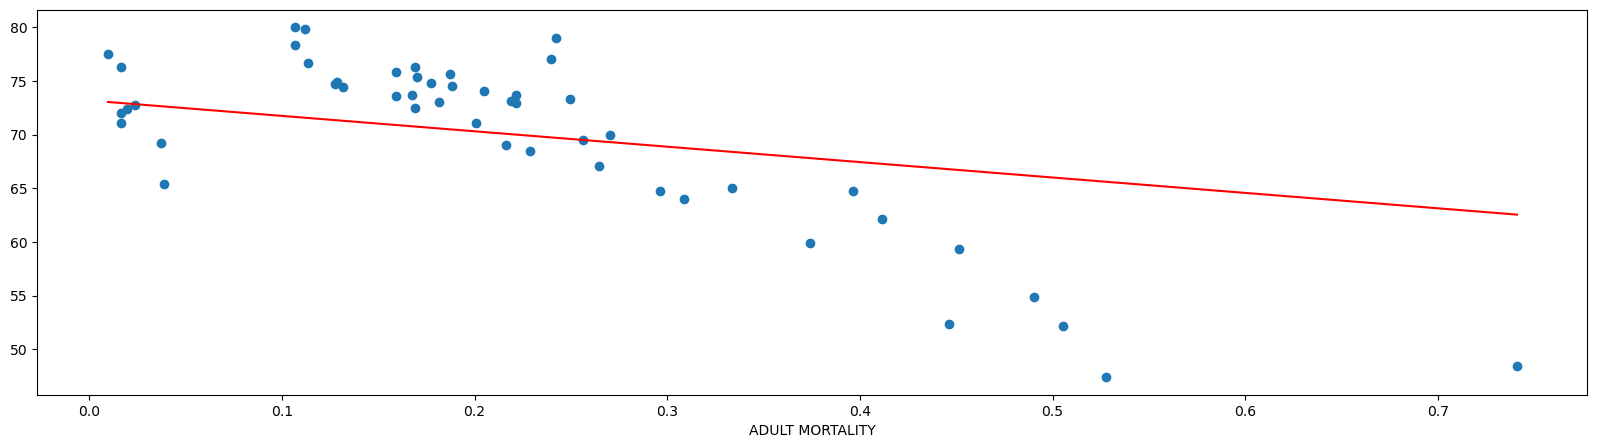

In [43]:
# fit the model
linsvr_reg_best.fit(X_b, y_b)
X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = linsvr_reg_best.predict(X_new)
plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('ADULT MORTALITY')

# 6. Kernel Support Vector Regression (SVR)

In [44]:
#To find the Default parameters of Kernel SVR model
kernel_svr = SVR()
kernelsvr_params = kernel_svr.get_params()
print(f'Default Linear Reg hyperparameters: {kernelsvr_params}')

Default Linear Reg hyperparameters: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [45]:
# Train the model with the Default Parameters
ker_svr_default = SVR()
ker_svr_default.fit(X_train, y_train)
y_kersvr_default_predicted = ker_svr_default.predict(X_test)
print("Train score: {:.4f}".format(ker_svr_default.score(X_train, y_train)))
print("Test score: {:.4f}".format(ker_svr_default.score(X_test, y_test)))
print('R2_score: {:.4f}'.format(r2_score(y_test,y_kersvr_default_predicted)))
MSE = np.square(np.subtract(y_test,y_kersvr_default_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))

Train score: 0.8410
Test score: 0.8353
R2_score: 0.8353
MSE: 14.6948


Text(0.5, 0, 'ADULT MORTALITY')

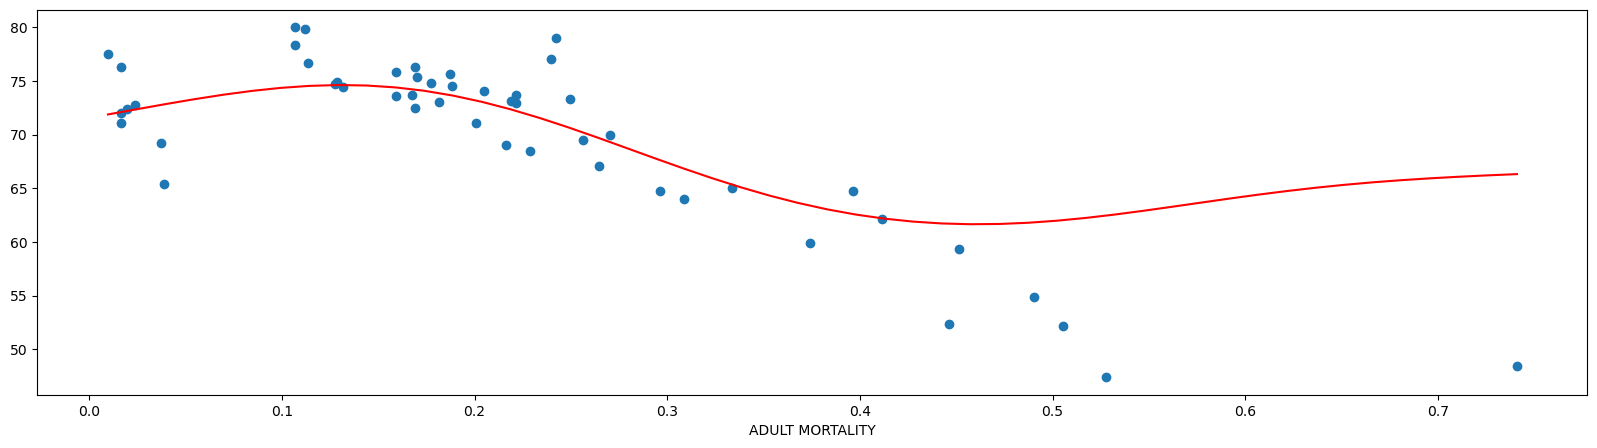

In [46]:
# fit the kernel SVR model
ker_svr_default.fit(X_b, y_b)
X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = ker_svr_default.predict(X_new)
plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('ADULT MORTALITY')

## Use Gridsearchcv to find the best hyperparameters for kernel SVR model

In [ ]:
# Hyperparameter tuning for the Kernal SVR model.
param_grid_KSVR = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'kernel':['linear','rbf']}
print("Parameter grid:\n{}".format(param_grid_KSVR))
kernel_svr = SVR()
grid_search_kSVR = GridSearchCV(estimator = kernel_svr, param_grid =param_grid_KSVR, cv = 5, return_train_score=True)
grid_search_kSVR.fit(X_train,y_train)
print("Best parameters for kernel SVR linear: {}".format(grid_search_kSVR.best_params_))

In [ ]:
print("hello")

In [ ]:
# Train the model with the best parameters
ksvr_best = SVR( kernel = 'linear', C=100, gamma=0.001)
ksvr_best.fit(X_train, y_train)
y_ksvr_best_predicted = ksvr_best.predict(X_test)
print('Train score: {:.4f}'.format(ksvr_best.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ksvr_best.score(X_test, y_test)))
print('R2_score: {:.4f}'.format(r2_score(y_test,y_ksvr_best_predicted)))
MSE = np.square(np.subtract(y_test,y_ksvr_best_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))

In [ ]:
# fit the model
ksvr_best.fit(X_b, y_b)
X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = ksvr_best.predict(X_new)
plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('ADULT MORTALITY')

In [ ]:
R2score_KNN = r2_score(y_test,y_knn_best_predicted)
R2score_SGD = r2_score(y_test,y_sgd_best_predicted)
R2score_Lasso = r2_score(y_test,y_lasso_best_predicted)
R2score_LinearSVR = r2_score(y_test,y_linsvr_best_predicted)
R2score_KernelSVR = r2_score(y_test,y_ksvr_best_predicted)

MSE_KNN = mean_squared_error(y_test,y_predicted)
MSE_SGD = mean_squared_error(y_test,ysgd_predicted)
MSE_Lasso =mean_squared_error(y_test,ylasso_predicted)
MSE_LinearSVR = mean_squared_error(y_test,linsvr_best_reg)
MSE_KernelRBF = mean_squared_error(y_test,y_ksvr_best_predicted)

In [ ]:
plt.figure(figsize=(20,10))

regs_i = 6
R2score_fin = [R2score_KNN, R2score_Polynomial, R2score_Decisiontree, R2score_KernelRBF]

fig, ax = plt.subplots()
index = np.arange(regs_i)
bar_width = 0.4

rects1 = plt.bar(index, R2score_fin, bar_width,
                    color='r',
                    label='R2 Score', align='center')

plt.xlabel('REGRESSION MODELS')
plt.ylabel('R2')
plt.title('BEST REGRESSION MODEL')
plt.xticks(index, ('KNN','LinearRegression','SGD','Lasso','LinearSVR','KernelSVR'))
plt.show()